In [976]:
import random
import matplotlib.pylab as plt

In [977]:
rgb = []
latitudes = [random.randint(-100, 100) for _ in range(10)]        # 后面第二种的递归算法较慢，因此只初始化了10个点
longitude = [random.randint(-100, 100) for _ in range(10)]
x_start = latitudes[0]
y_start = longitude[0]
point_start = (x_start, y_start)
# latitudes.insert(0,x_start)
# longitude.insert(0,y_start)

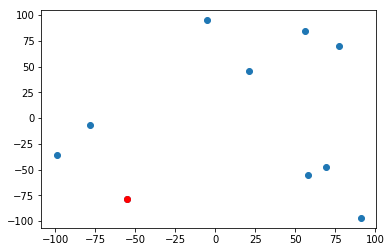

In [978]:
plt.scatter(latitudes, longitude)
plt.scatter(point_start[0], point_start[1] , c='r')

### 解法一、 利用贪心算法计算距离当前点的最近距离

In [979]:
import numpy as np
def euclidean_distance(a , b):
    vec1 = np.array(a)
    vec2 = np.array(b)
    distance= np.sqrt(np.sum(np.square(vec1-vec2)))
    return distance

In [980]:
from collections import defaultdict
import numpy as np
INF = 1e7
point_distance_memo = np.zeros((21, 21))
point_distance_all = defaultdict(list)
seened = set()
length_x = len(latitudes)
length_y = len(longitude)
for x , y in zip (range(length_x) , range(length_y)):
    point_x = (latitudes[x] , longitude[y])
    for x1 , y1 in zip (range(length_x) , range(length_y)):
        point_x1 = (latitudes[x1] , longitude[y1])
        if point_x  == point_x1 : 
            point_distance_memo[x][x1] = INF
            point_distance_memo[x1][x] = INF
        if point_x1 in seened : continue
        if point_distance_memo[x][x1] > 0:
            distance = point_distance_memo[x][x1]
        else:
            distance = euclidean_distance(point_x , point_x1)
            point_distance_memo[x][x1] = distance
            point_distance_memo[x1][x] = distance                
                    
        point_distance_all[point_x].append(([point_x1, distance]))

In [981]:
from collections import defaultdict
short_distance = 4000
short_point = ()
point_distance_all = defaultdict(list)
point_distance_memo = defaultdict(int)
seened = set()
result = []
from collections import defaultdict
for x , y in zip(latitudes , longitude):
    point_x = (x,y)    
    for x1 , y1 in zip(latitudes , longitude):
        point_x1 = (x1, y1)
        if point_x  == point_x1 : continue
        if point_x1 in seened : continue

        if ((point_x, point_x1)) in point_distance_memo:
            distance = point_distance_memo[(point_x, point_x1)]
        else:
            distance = euclidean_distance(point_x , point_x1)
            point_distance_memo[(point_x, point_x1)] = distance
            point_distance_memo[(point_x1, point_x)] = distance                
        
        point_distance_all[point_x].append(([point_x1, distance]))

In [982]:
# 可以开始查表了，所有点的距离全都有啦
successor = []
successor.append(point_start)
next_point = point_start
seened = set()
seened.add(point_start)
while len(successor) < len(latitudes):
    point_list = []
    for point , distance in point_distance_all[point_start]:
        if point in seened: continue
        point_list.append(([point, distance]))
    next_point, distance = min(point_list, key= lambda x : x[1])
    successor.append(next_point)
    point_start = next_point
    seened.add(next_point)    
successor

[(-55, -79),
 (-99, -36),
 (-78, -7),
 (21, 46),
 (56, 85),
 (77, 70),
 (-5, 95),
 (69, -48),
 (58, -55),
 (91, -97)]

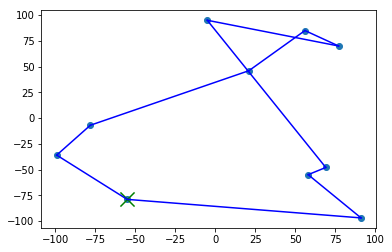

In [983]:
import time
plt.scatter(latitudes, longitude)
index = len(successor)
x0, y0 = successor[0]
xn, yn = successor[-1]

plt.scatter(x0, y0 ,color='g' ,marker = 'x', s = 200)
for i in range(index-1):
    x1, y1 = successor[i]
    x2, y2 = successor[i + 1]
    plt.plot([x1,x2], [y1, y2], color='b')
plt.plot([x0,xn], [y0, yn], color='b')

### 解法二、利用递归计算后继节点的最优,速度上没有优势

In [984]:
class Solution:
    def __init__(self, X, start_node):
        self.X = X  # 距离矩阵
        self.start_node = start_node  # 开始的节点
        self.array = [[0] * (2 ** (len(self.X) - 1)) for i in range(len(self.X))]  # 记录处于x节点，未经历M个节点时，矩阵储存x的下一步是M中哪个节点

    def transfer(self, sets):
        su = 0
        for s in sets:
            su = su + 2 ** (s - 1)  # 二进制转换
        return su

    # tsp总接口
    def tsp(self):
        s = self.start_node
        num = len(self.X)
        cities = list(range(num))  # 形成节点的集合
        # past_sets = [s] #已遍历节点集合
        cities.pop(cities.index(s))  # 构建未经历节点的集合
        node = s  # 初始节点
        return self.solve(node, cities)  # 求解函数

    def solve(self, node, future_sets):
        # 迭代终止条件，表示没有了未遍历节点，直接连接当前节点和起点即可
        if len(future_sets) == 0:
            return self.X[node][self.start_node]
        d = 99999
        # node如果经过future_sets中节点，最后回到原点的距离
        distance = []
        # 遍历未经历的节点
        for i in range(len(future_sets)):
            s_i = future_sets[i]
            copy = future_sets[:]
            copy.pop(i)  # 删除第i个节点，认为已经完成对其的访问
            distance.append(self.X[node][s_i] + self.solve(s_i, copy))
        # 动态规划递推方程，利用递归
        d = min(distance)
        # node需要连接的下一个节点
        next_one = future_sets[distance.index(d)]
        # 未遍历节点集合
        c = self.transfer(future_sets)
        # 回溯矩阵，（当前节点，未遍历节点集合）——>下一个节点
        self.array[node][c] = next_one
        return d

In [985]:
import random
import numpy as np
import math

# latitudes = [random.randint(-100, 100) for _ in range(10)]
# longitude = [random.randint(-100, 100) for _ in range(10)]

v = []
for i , j in zip(latitudes , longitude):
    v.append([i,j])

train_v= np.array(v)
train_d=train_v
dist = np.zeros((train_v.shape[0],train_d.shape[0]))

for i in range(train_v.shape[0]):
    for j in range(train_d.shape[0]):
        dist[i,j] = math.sqrt(np.sum((train_v[i,:]-train_d[j,:])**2))
        if i == j: dist[i,j] = -1

start = time.process_time()
S = Solution(dist, 0)
print(S.tsp())
end = time.process_time()
print("程序的运行时间是：%s" % (end - start))



684.541730364674
程序的运行时间是：5.167299999999159


In [986]:
# 开始回溯
M = S.array
lists = list(range(len(S.X)))
start = S.start_node
successor = []
successor.append((latitudes[start], longitude[start]))
while len(lists) > 0:        
    lists.pop(lists.index(start))
    m = S.transfer(lists)
    next_node = S.array[start][m]
    successor.append((latitudes[next_node], longitude[next_node]))
    print(start, "--->", next_node)
    start = next_node

0 ---> 6
6 ---> 2
2 ---> 5
5 ---> 4
4 ---> 1
1 ---> 9
9 ---> 8
8 ---> 3
3 ---> 7
7 ---> 0


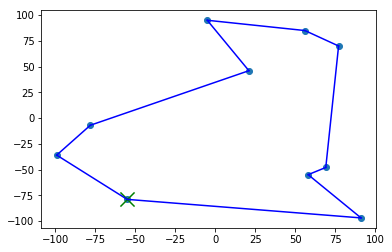

In [987]:
plt.scatter(latitudes, longitude)
index = len(successor)
x0, y0 = successor[0]
xn, yn = successor[-1]

plt.scatter(x0, y0 ,color='g' ,marker = 'x', s = 200)
for i in range(index-1):
    x1, y1 = successor[i]
    x2, y2 = successor[i + 1]
    plt.plot([x1,x2], [y1, y2], color='b')
plt.plot([x0,xn], [y0, yn], color='b')


### 解法三、计算DP表，N+1步的结果可以通过N步来求解，效率上高了很多

In [988]:
v = []
for x , y in zip(latitudes, longitude):
    v.append([x, y])

train_v = np.array(v)
train_d = train_v
dist = np.zeros((train_v.shape[0], train_d.shape[0]))

In [989]:
# 计算距离矩阵
for i in range(train_v.shape[0]):
    for j in range(train_d.shape[0]):
        dist[i, j] = math.sqrt(np.sum((train_v[i, :] - train_d[j, :]) ** 2))

In [990]:
N = train_v.shape[0]
path = np.ones((2 ** (N + 1), N))
dp = np.ones((2 ** (train_v.shape[0] + 1), train_d.shape[0])) * -1


def TSP(s, init, num):
    if dp[s][init] != -1:
        return dp[s][init]
    if s == (1 << (N)):
        return dist[0][init]
    sumpath = 1000000000
    for i in range(N):
        if s & (1 << i):
            m = TSP(s & (~(1 << i)), i, num + 1) + dist[i][init]
            if m < sumpath:
                sumpath = m
                path[s][init] = i
    dp[s][init] = sumpath
    return dp[s][init]

In [991]:
init_point = 0
s = 0
for i in range(1, N + 1):
    s = s | (1 << i)
start = time.process_time()
distance = TSP(s, init_point, 0)
end = time.process_time()
s = 0b11111111110
init = 0
num = 0
print(distance)
successor = []
while True:
#     print(int(path[s][init]))
    init = int(path[s][init])
    successor.append([latitudes[init], longitude[init]])
    s = s & (~(1 << init))
    num += 1
    if num >= N -1 :
        break
print("程序的运行时间是：%s" % (end - start))
successor

684.541730364674
程序的运行时间是：0.053624000000127126


[[-99, -36],
 [-78, -7],
 [21, 46],
 [-5, 95],
 [56, 85],
 [77, 70],
 [69, -48],
 [58, -55],
 [91, -97]]

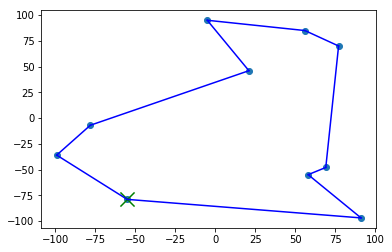

In [992]:
plt.scatter(latitudes, longitude)

x0, y0 = latitudes[0], longitude[0]
xn, yn = successor[-1]
successor.insert(0, [x0, y0])
index = len(successor)
plt.scatter(x0, y0, color='g', marker='x', s=200)
for i in range(index - 1):
    x1, y1 = successor[i]
    x2, y2 = successor[i + 1]
    plt.plot([x1, x2], [y1, y2], color='b')
plt.plot([x0, xn], [y0, yn], color='b')
plt.show()